<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 2

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, add it to your submissions folder and submit via Google Classroom as any other assignment.

### Quiz Information:
- This is an "open book" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. ANY RESOURCE YOU USE MUST BE CITED (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism. 
- You may NOT work with anyone else on this quiz (your classmates, your instructor, etc.).
- You will have one hour to take this quiz.

## Part 1: Getting the data
The dataset provided in this repository (`./data/concrete.csv`) consists of various amounts of different components used to create concrete and the concrete's [compressive strength](https://www.aboutcivil.org/compressive-strength-of-concrete.html). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [40]:
df = pd.read_csv('./data/concrete.csv')
df.head(5)

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `Unnamed: 0` column should not be a part of this dataset.
- Any null values in this datset are clerical errors. They should all be 0's.
- All columns in this dataset should be numeric.

**Please clean up the dataset.**

In [41]:
df.drop(columns='Unnamed: 0', inplace=True)

In [42]:
df.isna().sum()
df.fillna(0, inplace=True)

In [48]:
df['Age'] = df['Age'].map(lambda x: int(x.replace("'", "")))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the Water column
- A scatterplot of Coarse Aggregate compared to Fine Aggregate colored purple with a title and axis labels

**Please display these.**

In [51]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


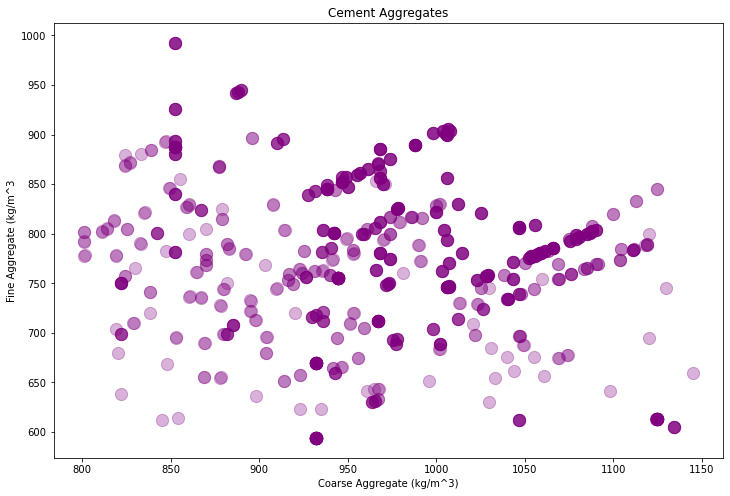

In [83]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Coarse Aggregate'], df['Fine Aggregate'], color='purple', alpha=.3, s=150)
plt.xlabel('Coarse Aggregate (kg/m^3)')
plt.ylabel('Fine Aggregate (kg/m^3')
plt.title('Cement Aggregates');

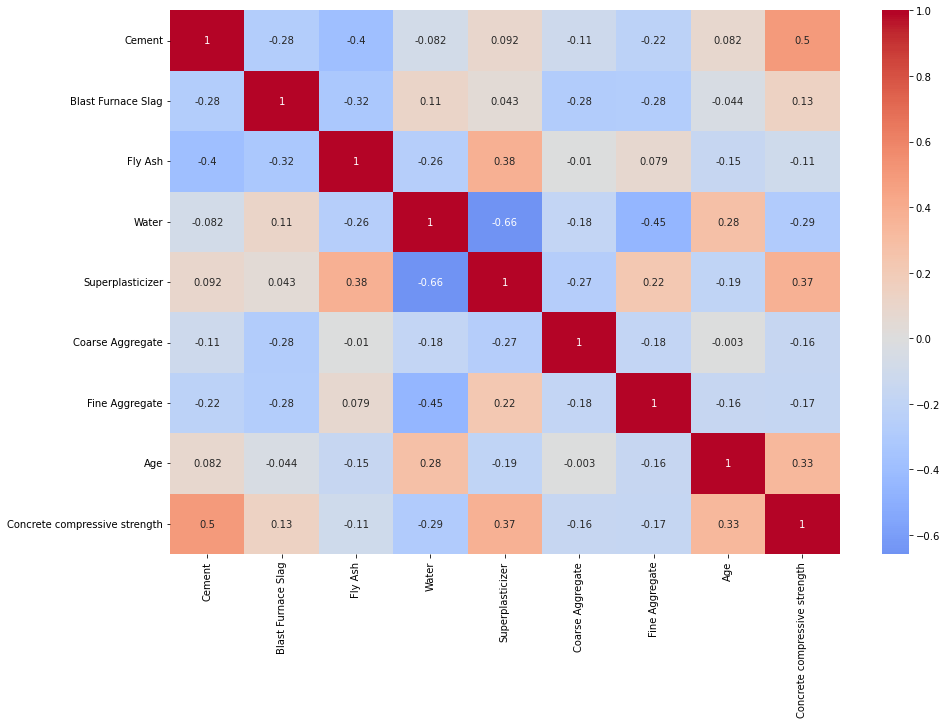

In [76]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, center=0, cmap='coolwarm');

### Part 4: Initial Findings

Based on an exploration of your data, what do you believe are important contributors to concrete's compressive strength? Write your answer using complete sentences and reference any summary statistics or visualizations necessary.

### Compressive Strength Initial Findings: 
##### The largest factor contributing to compressive strength is the amount of kilograms of the cement component in a cubic meter of concrete with a positive correlations of 0.5. 

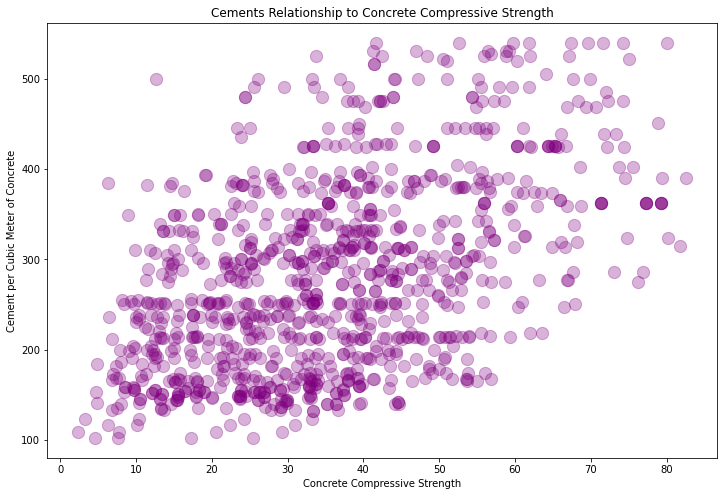

In [95]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Concrete compressive strength'], df['Cement'], color='purple', alpha=.3, s=150)
plt.xlabel('Concrete Compressive Strength')
plt.ylabel('Cement per Cubic Meter of Concrete')
plt.title('Cements Relationship to Concrete Compressive Strength');

##### The second and third most impactful components on Concrete Compressive Strength are Superplasticizer (+0.37 correlation) and Age (+0.33 correlation). As illustrated in the heat map above

##### Concrete compressive strength is negatively affected by the water content (-0.29 correlation).

#### Blasting slag, fly ash, coarse and fine aggregate had limited impacts on concrete compressive strength